# EDA 
- 데이콘 아파트 실거래가 예측 해커톤 수행
- 서울시 강남구 대치동 아파트 거래 데이터를 활용하여 탐색적 데이터 분석 진행



In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from datetime import datetime
from scipy import stats

# 설정 세팅하기
plt.rcParams['font.family'] = 'Malgun Gothic'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')

# 데이터 불러오기
- 주요 정보 : 대치동 아파트 거래 데이터
- 기간 : 2014.01.01 ~ 2023.06.30

<strong> 컬럼 정보 </strong> <br>
- id : 거래번호, 정수
- sigungu : 시군구
- jibun : 지번
- apt_name : 아파트 이름
- exclusive_use_area : 전용면적
- transaction_year_month : 거래연월
- transaction_day: 거래일
- transaction_real_price : 실거래가
- floor : 층수
- year_of_completion : 건설 완료 연도
- train_test : 학습 / 시험 데이터 분류


In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train['train_test'] = 'train'
test['train_test'] = 'test'

data = pd.concat([train, test], axis = 0)

In [3]:
train.head(5)

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test
0,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,7,174000,13,1983,train
1,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,9,157500,6,1983,train
2,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000,5,1983,train
3,TRAIN_0003,서울특별시 강남구 대치동,503,개포우성1,127.61,201402,10,152000,9,1983,train
4,TRAIN_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,201402,10,116000,3,1983,train


## 데이터 개요
- train : 5987개의 행, 11개의 컬럼
- test : 196개의 행, 10개의 컬럼 
- 결측치 데이터 없음

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5987 entries, 0 to 5986
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5987 non-null   object 
 1   sigungu                 5987 non-null   object 
 2   jibun                   5987 non-null   object 
 3   apt_name                5987 non-null   object 
 4   exclusive_use_area      5987 non-null   float64
 5   transaction_year_month  5987 non-null   int64  
 6   transaction_day         5987 non-null   int64  
 7   transaction_real_price  5987 non-null   int64  
 8   floor                   5987 non-null   int64  
 9   year_of_completion      5987 non-null   int64  
 10  train_test              5987 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 514.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column                  Non-Nu

(None, None)

In [5]:
display(train.sample(5), test.sample(5))

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test
953,TRAIN_0953,서울특별시 강남구 대치동,1014-3,대치삼성,59.88,201510,14,75000,9,2000,train
4393,TRAIN_4393,서울특별시 강남구 대치동,511,한보미도맨션1,128.01,201807,20,230000,4,1983,train
5137,TRAIN_5137,서울특별시 강남구 대치동,902,포스코더샵,139.54,201907,25,215000,9,2004,train
3410,TRAIN_3410,서울특별시 강남구 대치동,602,선경3차,76.60,201707,29,120000,9,1990,train
2365,TRAIN_2365,서울특별시 강남구 대치동,316,은마,76.79,201603,4,96000,7,1979,train


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,floor,year_of_completion,train_test
74,TEST_0074,서울특별시 강남구 대치동,65,쌍용대치2,120.76,202302,11,7,1983,test
75,TEST_0075,서울특별시 강남구 대치동,65,쌍용대치2,84.49,202304,19,7,1983,test
192,TEST_0192,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,19,1,1985,test
37,TEST_0037,서울특별시 강남구 대치동,888,대치아이파크,59.96,202302,5,15,2008,test
41,TEST_0041,서울특별시 강남구 대치동,888,대치아이파크,119.58,202304,27,12,2008,test


In [6]:
train.shape, test.shape

((5987, 11), (196, 10))

## 기초통계 확인하기

In [7]:
train.describe()

,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion
count,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000
mean,96.437380,201699.414398,15.902789,158144.810423,9.236178,1992.938533
std,31.991673,208.265846,8.750938,78877.484068,5.959184,12.418632
min,20.370000,201401.000000,1.000000,18000.000000,1.000000,1979.000000
25%,76.790000,201509.000000,8.000000,100000.000000,5.000000,1983.000000
50%,84.810000,201704.000000,16.000000,146000.000000,8.000000,1989.000000
75%,119.580000,201903.000000,23.000000,202250.000000,13.000000,2004.000000
max,209.790000,202212.000000,31.000000,535000.000000,35.000000,2017.000000


In [8]:
# 전용면적이 적은 아파트
train[train['exclusive_use_area'] == min(train['exclusive_use_area'])]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test
5915,TRAIN_5915,서울특별시 강남구 대치동,890-49,선릉역대우아이빌(890-49),20.37,202205,2,19000,11,2004,train


In [9]:
# 실 거래가가 가장 낮은 아파트
train[train['transaction_real_price'] == min(train['transaction_real_price'])]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test
472,TRAIN_0472,서울특별시 강남구 대치동,890-49,선릉역대우아이빌(890-49),25.42,201403,24,18000,11,2004,train
475,TRAIN_0475,서울특별시 강남구 대치동,890-49,선릉역대우아이빌(890-49),25.42,201410,7,18000,11,2004,train


In [10]:
# 실 거래가가 가장 높은 아파트 
train[train['transaction_real_price'] == max(train['transaction_real_price'])]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test
5697,TRAIN_5697,서울특별시 강남구 대치동,1027,래미안대치팰리스,151.31,202104,1,535000,25,2015,train


In [11]:
data.dtypes

id                         object
sigungu                    object
jibun                      object
apt_name                   object
exclusive_use_area        float64
transaction_year_month      int64
transaction_day             int64
transaction_real_price    float64
floor                       int64
year_of_completion          int64
train_test                 object
dtype: object

In [12]:
# 시각화 전 거래년월 컬럼의 int형식을 string형식으로 변환 
data['transaction_year_month'] = data['transaction_year_month'].astype('str')

In [13]:
data.dtypes

id                         object
sigungu                    object
jibun                      object
apt_name                   object
exclusive_use_area        float64
transaction_year_month     object
transaction_day             int64
transaction_real_price    float64
floor                       int64
year_of_completion          int64
train_test                 object
dtype: object

In [14]:
train = data[data['train_test'] == 'train']

In [15]:
test  = data[data['train_test'] == 'test']

# EDA
##  거시적 관점
- 부동산 시장의 건전성과 안정성을 이해하기 위해 전체 경제적 상황과 트렌드를 고려함

<strong><font size = '4'>그래프  1 : 시간에 따른 부동산 실거래가 </strong>
    <br>
가설 1 : 대치동으로 한정된 아파트 실거래가는 경제적 특성에 영향을 미칠 것이다.
- 일정 구간에서 급격히 하락하는 이슈 발생
 - 201708 : 부동산 대책 발표
 - 201812 : 부동산 대책 발표  
 - 202007 : 부동산 대책 + 이자율 
 - 202111 : 부동산 대책 + 대선 + 급등한 주택 가격의 이유로 소비 위축
- 부동산 실거래가가 급격하게 감소하거나 증가할때마다, 부동산 대책 발표나 기준 금리의 영향 존재 <br>
- 기준 금리, GDP 성장률과 실거래가 그래프 비교

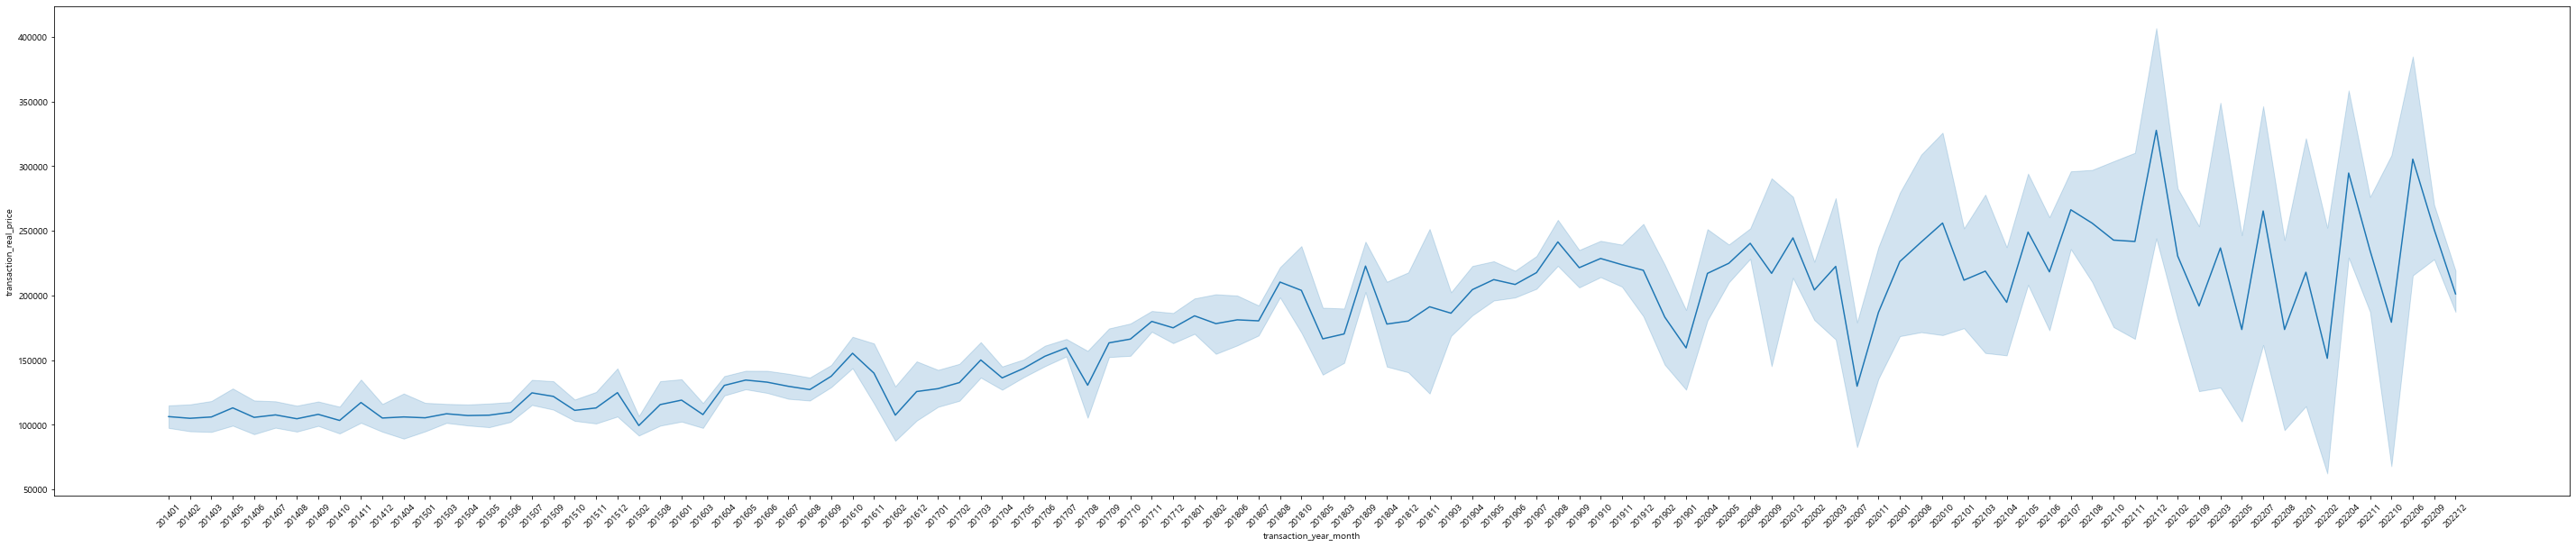

In [16]:
plt.figure(figsize= (50,10))
sns.lineplot(data = train, x = 'transaction_year_month', y = 'transaction_real_price')
plt.xticks(rotation=45)
plt.show()

### 기준금리
- 한국은행 : https://ecos.bok.or.kr/#/SearchStat
- 기준금리 상승 : 부동산 투자를 위한 대출 이자가 상대적으로 높기 때문에 아파트 매매에 대한 수요를 줄일 수 있음
- 기준금리 하락 : 부동산 투자를 위한 대출 이자가 상대적으로 낮기 때문에 아파트 매매에 대한 수요를 늘릴 수 있음
- 변동일자를 기준으로 전처리 필요

In [17]:
interest = pd.read_excel('../data/한국은행 기준금리 및 여수신금리_변동일자기준.xlsx')
interest = interest.sort_values(by=['년도'])
interest.head()

,년도,변동일자,기준금리
22,2012,10월 11일,2.75
21,2013,05월 09일,2.50
20,2014,08월 14일,2.25
19,2014,10월 15일,2.00
18,2015,03월 12일,1.75


In [18]:
# 기간 컬럼 생성
interest['년도'] = interest['년도'].astype(str)
interest['기간'] = interest['년도'] +'년' + interest['변동일자']

<strong><font size = '4'>그래프 1-1 : 기준금리</strong>
    
- 2016년 낮은 경제성장률로 인한 기준금리 인하
- 2020년 코로나로 인한 경기 둔화 우려로 기준금리 인하


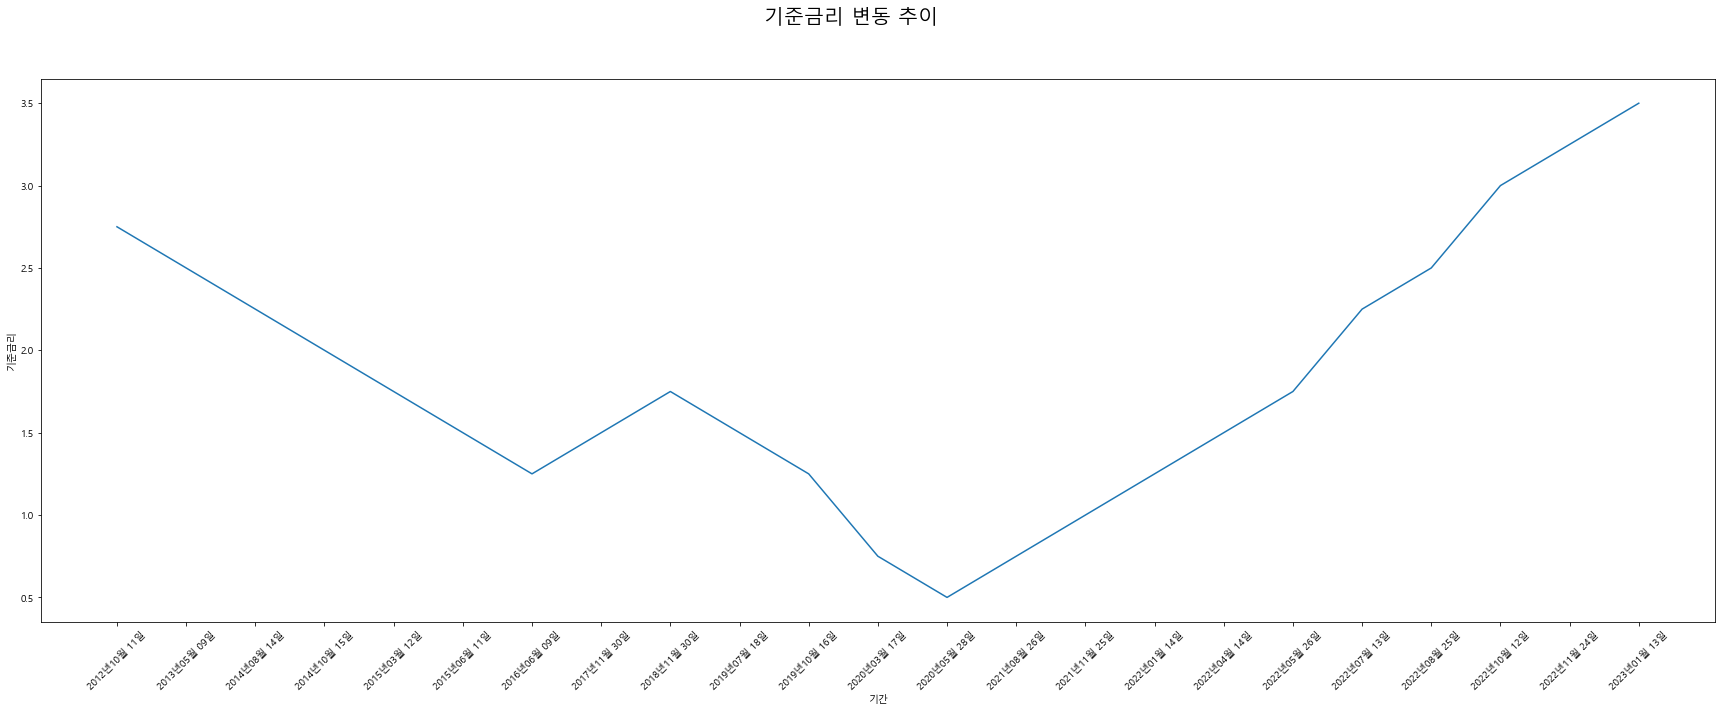

In [107]:
plt.figure(figsize= (30,10))

sns.lineplot(data = interest, x = '기간', y = '기준금리')

plt.suptitle('기준금리 변동 추이', fontsize=20)
plt.xticks(rotation = 45)
plt.show()

### GDP 성장률
- e-나라지표 :https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=2736
- 일정기간동안 각 경제활동부문이 만들어낸 부가가치가 얼마나 증가하였가를 보는 지표
- 투자 환경 파악 / 경제 상황 반영 / 미래 예측 가능
- 분기별로 집계되는 데이터를 고려하여 전분기 데이터 사용

In [20]:
gdp = pd.read_excel('../data/GDP 성장률.xlsx')
gdp.head()

,기간,GDP 성장률
0,2012-Q4,0.5
1,2013-Q1,0.9
2,2013-Q2,1.2
3,2013-Q3,0.9
4,2013-Q4,0.9


<strong><font size = '4'>그래프 1-2 : GDP 성장률</strong>


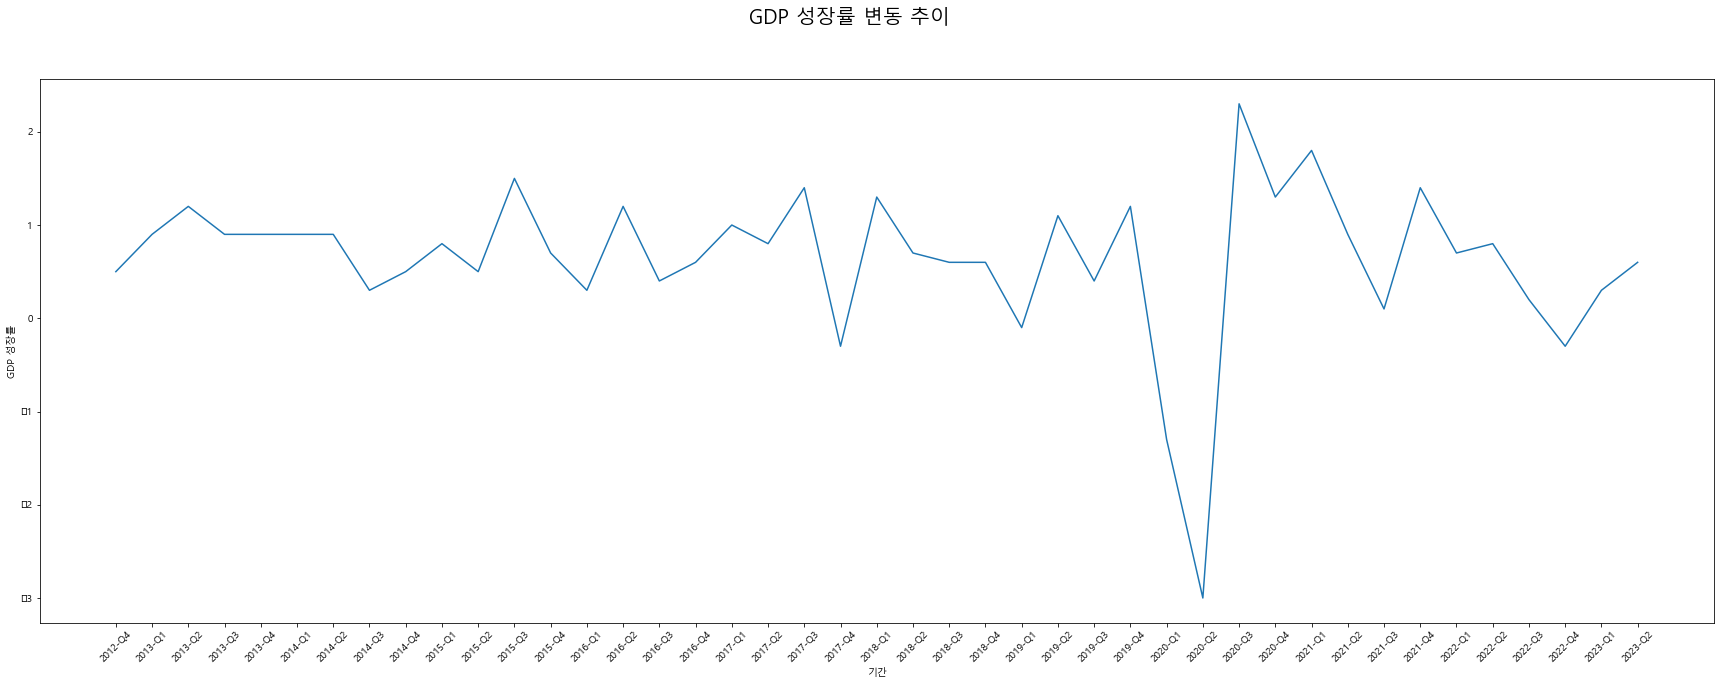

In [109]:
plt.figure(figsize= (30,10))

sns.lineplot(data = gdp, x = '기간', y = 'GDP 성장률') 

plt.suptitle('GDP 성장률 변동 추이',fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

## 내부적 요인
- 제공된 데이터의 변수(건령, 면적,층수)와 실거래가 사이의 관계를 시각화를 통해 살펴봄
- 아파트 내부적 요인이 실거래가에 미치는 영향을 파악하기 위함

<strong><font size = '4'>그래프 2 : 아파트 실거래가 분포</strong>
- 1억부터 50억까지 넓은 범위에 분포함

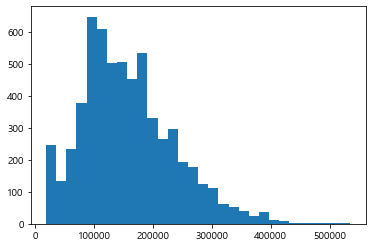

In [22]:
plt.hist(train['transaction_real_price'], bins = 30)
plt.show()

### 건령별 실거래가 

In [24]:
data['transaction_year_month'].dtypes

dtype('O')

In [25]:
data['year'] = data['transaction_year_month'].str.slice(0, 4)

In [26]:
train = data[data['train_test'] == 'train']

In [27]:
data['year'] = data['year'].astype('int64')

In [28]:
def make_age(transaction_year, completion_year):
    age = transaction_year - completion_year

    if age <= 10:
        return '10년 이하'
    elif age <= 15:
        return '15년 이하'
    elif age <= 20:
        return '20년 이하'
    else:
        return '20년 초과'

data['age'] = data.apply(lambda row: make_age(row['year'], row['year_of_completion']), axis=1)
data['age'].value_counts()

20년 초과    3333
15년 이하    1116
10년 이하    1040
20년 이하     694
Name: age, dtype: int64

In [29]:
train = data[data['train_test'] == 'train']

<strong><font size = '4'>그래프 2-2-1 : 건령별 아파트 실거래가 분포</strong>
- 가설 2 : 건령이 낮을수록, 아파트 실거래가가 높게 나타남. <br>
=> 대체적으로 건령이 낮을수록 실거래가가 높게 나타난다. 하지만 20년 초과 건물의 경우, 높은 가격을 유지하거나 상승하는 추세를 보임 <br>
- 필터링을 진행했을 때 재건축 시행 예정이거나 이미 재건축된 건물이 나타남. 대치동 특성 상 재건축 여부(재건축 프리미엄)에 따라 실거래가가 변동되는 경향이 있음 <br>

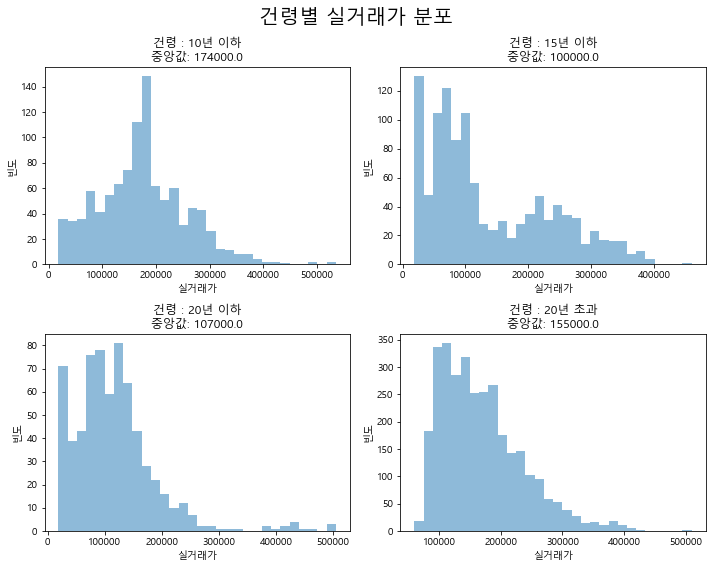

In [106]:

# 4개의 서로 다른 Axes 생성
fig, axes = plt.subplots(2, 2, figsize=(10, 8))


# 건축완공년도별 아파트 실거래가 히스토그램 그리기 - 5년 이하는 test data 
age_labels = ['10년 이하', '15년 이하', '20년 이하', '20년 초과']
age_values = ['10년 이하', '15년 이하', '20년 이하', '20년 초과']

for i, age in enumerate(age_values):
    prices = train[train['age'] == age]['transaction_real_price']
    median_price = np.median(prices)
    
    if i < 4:  # 인덱스가 4보다 작을 때만 서브플롯에 그래프 그리기
        ax = axes[i // 2, i % 2]  # 해당 위치의 Axes 선택
        ax.hist(prices, bins=30, alpha=0.5)
        ax.set_title(f'건령 : {age}\n중앙값: {median_price}')
        ax.set_xlabel('실거래가')
        ax.set_ylabel('빈도')
        
plt.suptitle('건령별 실거래가 분포', fontsize=20)
plt.tight_layout()  # 그래프 간격 조정

plt.show()


In [31]:
train['age'].iloc[:4]

0    20년 초과
1    20년 초과
2    20년 초과
3    20년 초과
Name: age, dtype: object

In [32]:
train.groupby(['age']).describe()['transaction_real_price']

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
10년 이하,1026.0,175388.269981,82293.332743,18000.0,121000.0,174000.0,224000.0,535000.0
15년 이하,1107.0,137091.987353,96376.001032,18800.0,62000.0,100000.0,214500.0,460000.0
20년 이하,670.0,117420.470149,74026.852218,19000.0,72500.0,107000.0,145000.0,505000.0
20년 초과,3184.0,168477.408920,66593.241663,59800.0,116000.0,155000.0,204000.0,510000.0


<strong><font size = '3'> 20년 초과 아파트 필터링 </strong>
- 주로 재건축 예정인 아파트(은마, 한보미도맨션, 선경, 개포우성, 미도맨션 등)가 다수 나타남
- 재건축 여부 변수를 생성하여 모델을 돌릴 수 있겠으나, 재건축 시행 여부가 확실하지 않아 고려하기 어려움. 
<br></br>
- 건령이 높은 경우, 별도의 아파트 명칭을 붙인 경우가 많음. 
- 아파트의 브랜드도 고려할 수 있겠으나, 건령이 높은 경우가 많아 아파트 브랜드를 고려하기 어려울 것으로 보임


In [33]:
age_upper_20 = train[(train['age'] == '20년 초과')]

In [34]:
age_upper_20.shape

(3184, 13)

In [35]:
# 20년 초과 아파트 필터링
print( f"아파트 개수 : {age_upper_20['apt_name'].nunique()}" ,'\n' ,age_upper_20['apt_name'].unique() )

아파트 개수 : 21 
 ['개포우성1' '개포우성2' '국제' '대치우성아파트1동,2동,3동,5동,6동,7동' '래미안대치하이스턴' '선경1차(1동-7동)'
 '선경2차(8동-12동)' '선경3차' '쌍용대치2' '쌍용대치아파트1동,2동,3동,5동,6동' '은마' '한보미도맨션1'
 '한보미도맨션2' '현대1' '미도맨션3차' '청암빌라트' '대치현대' '대치효성' '노빌리티빌리지' '대치삼성' '삼성3차']


In [36]:
# 75% 분위수(Q3) 계산
Q3 = age_upper_20['transaction_real_price'].quantile(0.75)

# Q3보다 큰 데이터만 필터링
filtered_data = age_upper_20[age_upper_20['transaction_real_price'] > Q3]

print( f"아파트 개수 : {filtered_data['apt_name'].nunique()}" ,'\n' ,filtered_data['apt_name'].unique() )

아파트 개수 : 18 
 ['개포우성1' '한보미도맨션1' '한보미도맨션2' '개포우성2' '선경1차(1동-7동)' '선경2차(8동-12동)'
 '래미안대치하이스턴' '쌍용대치2' '쌍용대치아파트1동,2동,3동,5동,6동' '은마'
 '대치우성아파트1동,2동,3동,5동,6동,7동' '대치현대' '노빌리티빌리지' '대치삼성' '삼성3차' '선경3차' '청암빌라트'
 '현대1']


In [37]:
train['apt_name'].unique()

array(['개포우성1', '개포우성2', '국제', '대우아이빌멤버스(891-26)', '대우아이빌명문가(891-23)',
       '대치동우정에쉐르1', '대치동우정에쉐르2(890-42)', '대치삼성', '대치아이파크',
       '대치우성아파트1동,2동,3동,5동,6동,7동', '대치하나빌', '대치한신휴플러스', '대치현대', '대치효성',
       '동민맥스빌A동', '동부센트레빌', '동양', '래미안대치하이스턴', '롯데캐슬', '롯데캐슬리베', '메트로',
       '삼성3차', '삼환SOGOOD', '상지리츠빌카일룸(1009-4)', '선경1차(1동-7동)',
       '선경2차(8동-12동)', '선경3차', '선릉역대우아이빌(890-49)', '선릉역풍림아이원레몬', '세연파크뷰',
       '세영팔레스타운', '신성미소시티', '쌍용대치2', '쌍용대치아파트1동,2동,3동,5동,6동',
       '아름빌(889-74)', '은마', '테헤란로대우아이빌(891-6)', '포스코더샵',
       '풍림아이원1차101동(910-3)', '풍림아이원2차201동', '풍림아이원3차(1007-1)',
       '풍림아이원4차(1007-2)', '풍림아이원아파트', '하이캐슬', '하이캐슬102동', '한보미도맨션1',
       '한보미도맨션2', '한티(933-35)', '현대1', '화인하이빌', '대치주성', '대치타워', '동민맥스빌B동',
       '래미안대치팰리스', '미도맨션3차', '스카이써밋아파트', '우정에쉐르', '청원',
       '풍림아이원1차103동(910-5)', '풍림아이원2차202동', '한양팰리스', '해암프리존', '월드빌',
       '노빌리티빌리지', '대치SKVIEW', '삼성2차', '한티(933-0)', '현대썬앤빌테헤란', '청암빌라트'],
      dtype=object)

In [38]:
re_apt = train[train['apt_name'].str.contains('은마|개포우성1|미도|대치우성|국제|한보미도|선경|해암프리존|977-1|쌍용대치')]

In [39]:
re_apt['apt_name'].unique()

array(['개포우성1', '국제', '대치우성아파트1동,2동,3동,5동,6동,7동', '선경1차(1동-7동)',
       '선경2차(8동-12동)', '선경3차', '쌍용대치2', '쌍용대치아파트1동,2동,3동,5동,6동', '은마',
       '한보미도맨션1', '한보미도맨션2', '미도맨션3차', '해암프리존'], dtype=object)

In [40]:
re_median = np.median( re_apt['transaction_real_price'])

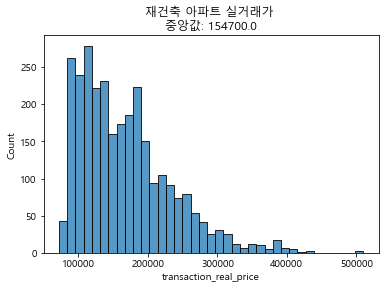

In [41]:
plt.title(f'재건축 아파트 실거래가 \n중앙값: {re_median}')
sns.histplot(re_apt['transaction_real_price'])
plt.show()

<strong><font size = '3'> 재건축 단지별로 실거래가 평균 내보기

In [42]:
re_price = re_apt.groupby(['apt_name'])['transaction_real_price'].agg(['mean','count']).sort_values(by='mean', ascending = False)
re_price

,mean,count
apt_name,,
개포우성1,218452.073733,217
선경1차(1동-7동),212493.715847,183
선경2차(8동-12동),211106.880734,109
한보미도맨션1,203457.679181,293
한보미도맨션2,193969.932432,296
"쌍용대치아파트1동,2동,3동,5동,6동",171598.979592,98
쌍용대치2,164732.692308,52
"대치우성아파트1동,2동,3동,5동,6동,7동",151969.780220,91
은마,140661.497290,1476


<strong><font size = '4'>그래프 2-2-2 : 건령별 아파트 실거래가 분포</strong>
- p-value가 0.05보다 적어, 적어도 하나의 그룹 간에는 중앙값에 유의미한 차이가 있음
- H0 : 귀무 가설(모든 그룹의 중앙값이 같다)
- H1 : 대립 가설(적어도 하나의 그룹 간에는 중앙값에 유의미한 차이가 있다)
- 1(10년 이하), 2(15년 이하), 3(20년 초과), 4(20년 이하)

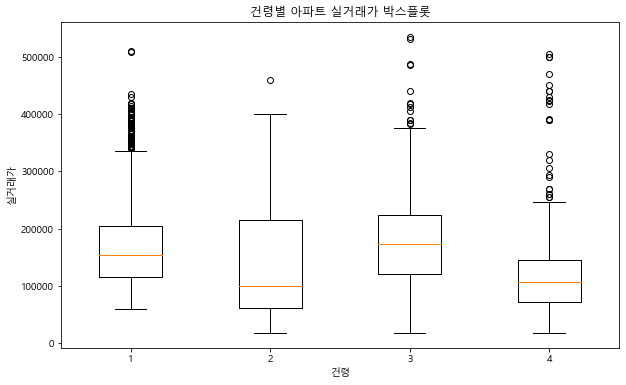

Kruskal-Wallis H-test 결과: H-value = 513.0219495768389, p-value = 7.187059114349553e-111
건령별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 있습니다.


In [43]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot([train['transaction_real_price'][train['age'] == age] for age in train['age'].unique()]) 
plt.title('건령별 아파트 실거래가 박스플롯')
plt.xlabel('건령')
plt.ylabel('실거래가')
plt.show()

# Kruskal-Wallis H-test 수행
kw_result = stats.kruskal(*[train['transaction_real_price'][train['age'] == age] for age in train['age'].unique()])

print(f'Kruskal-Wallis H-test 결과: H-value = {kw_result.statistic}, p-value = {kw_result.pvalue}')

# p-value 해석
if kw_result.pvalue < 0.05:
    print("건령별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("건령별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 없습니다.")


### 면적별 실거래가

In [44]:
def make_area_bucket(area):
    if area <= 59:
        return '소형'
    elif area <= 84:
        return '중형'
    else:
        return '대형'
    
# 아파트 면적 전처리
data['bucket_area'] = data['exclusive_use_area'].apply(make_area_bucket)

In [45]:
data['bucket_area'] = data['exclusive_use_area'].apply(make_area_bucket)
data['bucket_area'].value_counts()

대형    4284
중형    1564
소형     335
Name: bucket_area, dtype: int64

In [46]:
train = data[data['train_test'] == 'train']

In [47]:
train['bucket_area'].value_counts()

대형    4156
중형    1508
소형     323
Name: bucket_area, dtype: int64

<strong><font size = '4'>그래프 2-3 : 면적별 아파트 실거래가 분포</strong>
- 가설 3 : 아파트 면적이 넓을수록, 아파트 실거래가가 높을 것이다.
- 소형,중형, 대형 평수로 나눠 아파트 실거래가의 분포를 확인한 결과 면적이 넓을수록 아파트의 실거래가가 높게 나타났다.
- 구축 아파트가 많은 대치동 특성 상, 대형 아파트가 중형, 소형 아파트에 비해 많이 공급되었다.

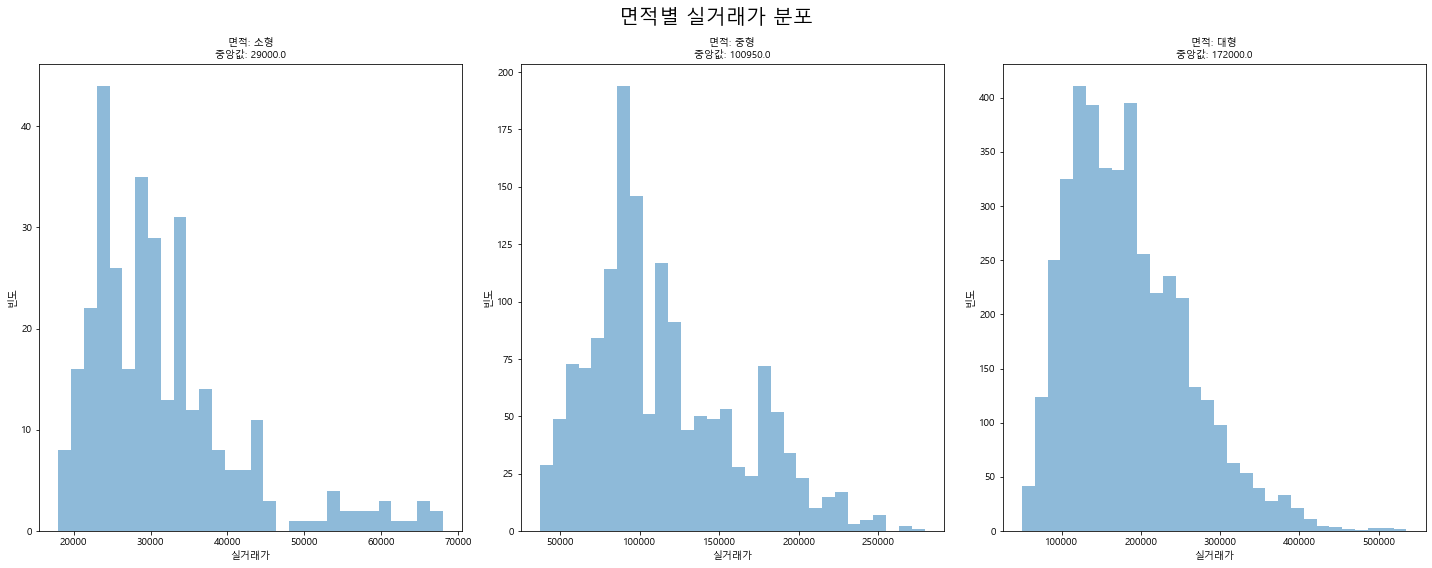

In [101]:
# 4개의 서로 다른 Axes 생성
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# 면적별 아파트 실거래가 히스토그램 그리기
area_labels = ['소형(25평)','중형(34평)','대형(36평 초과)']
area_values = ['소형','중형','대형']

for i, area in enumerate(area_values):
    prices = train[train['bucket_area'] == area]['transaction_real_price']
    median_price = np.median(prices)
    if i < 4:  # 인덱스가 4보다 작을 때만 서브플롯에 그래프 그리기
        ax = axes[i]  # 해당 위치의 Axes 선택
        ax.hist(prices, bins=30, alpha=0.5)
        ax.set_title(f'면적: {area}\n중앙값: {median_price}',fontsize = 10)
        ax.set_xlabel('실거래가')
        ax.set_ylabel('빈도')
        
plt.suptitle('면적별 실거래가 분포', fontsize=20) 
plt.tight_layout()  # 그래프 간격 조정
plt.show()

<strong><font size = '4'>그래프 2-3 : 면적별 아파트 실거래가 분포</strong>
- p-value가 0.05보다 적어, 적어도 하나의 그룹 간에는 중앙값에 유의미한 차이가 있음
- H0 : 귀무 가설(모든 그룹의 중앙값이 같다)
- H1 : 대립 가설(적어도 하나의 그룹 간에는 중앙값에 유의미한 차이가 있다)
- 1(대형), 2(소형), 3(중형)

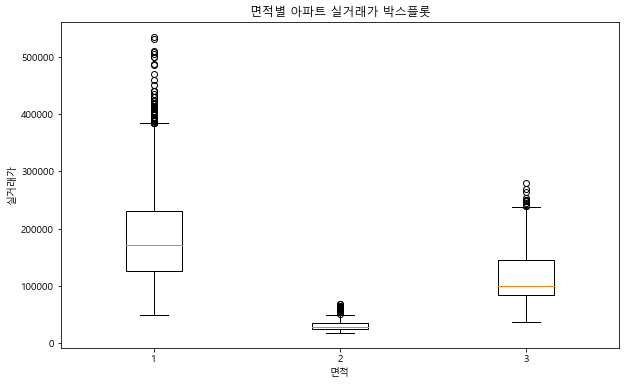

Kruskal-Wallis H-test 결과: H-value = 1885.4809135550036, p-value = 0.0
건령별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 있습니다.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot([train['transaction_real_price'][train['bucket_area'] == area] for area in train['bucket_area'].unique()]) 
plt.title('면적별 아파트 실거래가 박스플롯')
plt.xlabel('면적')
plt.ylabel('실거래가')
plt.show()

# Kruskal-Wallis H-test 수행
kw_result = stats.kruskal(*[train['transaction_real_price'][train['bucket_area'] == area] for area in train['bucket_area'].unique()])

print(f'Kruskal-Wallis H-test 결과: H-value = {kw_result.statistic}, p-value = {kw_result.pvalue}')

# p-value 해석
if kw_result.pvalue < 0.05:
    print("건령별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("건령별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 없습니다.")



### 층수별 아파트 실거래가
- 가설 4 : 고층(탑층제외)일수록, 아파트 실거래가가 높게 나타난다.<br>
- 동일 단지에 대해 시각화를 진행함
- 고층보다는 특정 층수의 아파트 실거래가가 높게 나타남

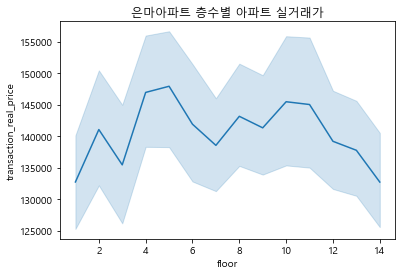

In [124]:
# 은마아파트 
enma_apt = train[(train['apt_name'] == '은마') ]
sns.lineplot(data = enma_apt, x = 'floor', y = 'transaction_real_price')
plt.title('은마아파트 층수별 아파트 실거래가')
plt.show()

In [116]:
enma_apt[enma_apt['transaction_real_price'] == enma_apt['transaction_real_price'].min()]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,year,age,bucket_area
563,TRAIN_0563,서울특별시 강남구 대치동,316,은마,76.79,201402,19,72000.0,12,1979,train,2014,20년 초과,중형


In [117]:
enma_apt[enma_apt['transaction_real_price'] == enma_apt['transaction_real_price'].max()]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,year,age,bucket_area
5804,TRAIN_5804,서울특별시 강남구 대치동,316,은마,84.43,202111,15,282000.0,5,1979,train,2021,20년 초과,대형


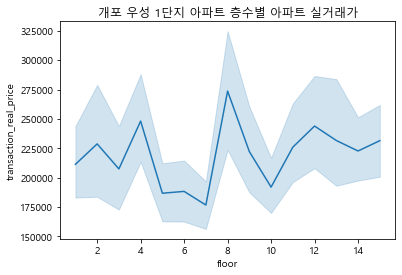

In [120]:
gaepo_apt = train[(train['apt_name'] == '개포우성1') ]
sns.lineplot(data = gaepo_apt, x = 'floor', y = 'transaction_real_price')
plt.title('개포 우성 1단지 아파트 층수별 아파트 실거래가')
plt.show()

In [121]:
gaepo_apt[gaepo_apt['transaction_real_price'] == gaepo_apt['transaction_real_price'].min()]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,year,age,bucket_area
17,TRAIN_0017,서울특별시 강남구 대치동,503,개포우성1,84.81,201406,23,105000.0,9,1983,train,2014,20년 초과,대형


In [122]:
gaepo_apt[gaepo_apt['transaction_real_price'] == gaepo_apt['transaction_real_price'].max()]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,year,age,bucket_area
5869,TRAIN_5869,서울특별시 강남구 대치동,503,개포우성1,158.54,202203,19,510000.0,12,1983,train,2022,20년 초과,대형


## 미시적 관점
- 특정 지역이나 도시 내의 부동산 시장에서 발생하는 거래의 현황과 소비자들의 태도나 기대를 분석하여 해당 지역의 부동산 시장을 이해하는 것을 중점으로 함

- 아파트 실거래가는 특정 지역이나 도시 내의 아파트 시장에서 발생하는 거래 가격을 나타내므로, 해당 지역이나 도시의 부동산 시장에 대한 세부적인 특성과 관련이 있음
- 해당 지역의 부동산 소비 심리 지수, 아파트 매매 실 거래 가격지수, 년도별 아파트 실거래가, 전세가를 살펴봄


### 부동산 소비심리지수
- KOSIS : https://kosis.kr/statHtml/statHtml.do?orgId=390&tblId=DT_39002_01&conn_path=I2
- 주택시장 , 토지시장, 주택매매시장, 주택전세시장 지수가 단계적으로 더해진 지수 
- 부동산시장 참여자의 형태변화 패턴과 그에 따른 움직임을 시의성 있게 파악 가능함

In [52]:
# 부동산시장 소비심리지수 데이터 불러오기
consume = pd.read_csv('../data/부동산시장_소비심리지수.csv', encoding = 'cp949')
consume.head()

,시도별(1),시도별(2),2013.12,2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,2014.09,2014.1,2014.11,2014.12,2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,2015.09,2015.1,2015.11,2015.12,2016.01,2016.02,2016.03,2016.04,2016.05,2016.06,2016.07,2016.08,2016.09,2016.1,2016.11,2016.12,2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,2017.08,2017.09,2017.1,2017.11,2017.12,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.1,2018.11,2018.12,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,2019.1,2019.11,2019.12,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.1,2020.11,2020.12,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.1,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04,2023.05,2023.06
0,수도권,서울특별시,112.6,128.8,132.6,117.1,116.2,113.6,107,115,125.5,127.9,129.5,122.5,114,133.9,136.6,138.7,139.7,137.8,129.7,138.9,136.2,131.5,138.1,128.5,110.7,117.6,120.1,119.2,123.9,126.4,126.6,128.8,130.5,127.4,128.7,113.8,102.8,107.8,113.1,114.8,119.2,126.2,125.4,134.1,116.4,117.3,119.7,120.2,114.8,126.8,126.3,116.3,108.3,109.8,106.3,111.9,127.5,126.2,115.1,106.5,93.9,91.8,94.5,93.5,92.1,98.6,111.2,119.4,118.2,122.5,130.6,129.7,125.6,116.5,120.1,109.8,102.2,112.5,131.9,139.4,131.9,127.3,131.6,133.2,130.8,129.1,124.7,116.6,117.1,124.1,127.9,130.7,132.9,129.5,118.2,111.3,102,100.7,101.2,107.1,113,107.3,100.9,93,88.3,88.5,78.7,74.3,76,82.8,93.7,97.5,99.3,103.7,105.3


In [53]:
# 다루기 쉬운 형식으로 변환
df_consume = consume.T.reset_index().iloc[2:]
df_consume.columns = ['기간','소비심리지수']

In [54]:
display( df_consume.head(3), df_consume.dtypes )

,기간,소비심리지수
2,2013.12,112.6
3,2014.01,128.8
4,2014.02,132.6


기간        object
소비심리지수    object
dtype: object

In [55]:
# float 형식으로 변환
df_consume['소비심리지수'] = df_consume['소비심리지수'].astype('float')

In [56]:
# train data에 대해 그래프 시각화
train_consume = df_consume[df_consume['기간'] < '202301']

In [57]:
train['year'] = train['transaction_year_month'].astype(int) // 100

# 'year' 열의 처음 5개 값 확인
print(train['year'].head())

0    2014
1    2014
2    2014
3    2014
4    2014
Name: year, dtype: int32


- 사분위수로 이상치를 처리하기에는 많은 데이터가 존재
- 해당 데이터를 제거하기에는 데이터의 정보 손실이 존재

<strong><font size = '4'>그래프 1-1 : 부동산 소비심리지수</strong>
- KOSIS 데이터 :https://kosis.kr/statHtml/statHtml.do?orgId=390&tblId=DT_39002_01&conn_path=I2
- 부동산시장 소비심리지수는 0~200의 값으로 표현되며, 지수가 100을 넘으면 전월에 비해 가격상승 및 거래증가 응답자가 많음을 의미
- 그래프를 확인한 결과, 위와 같은 정책이나 경제상황의 이슈가 발생할 경우 부동산 심리지수가 위축되는 형태로 나타남
- 서울특별시 기준
- 데이터가 한 달 뒤에 생성되는 점을 고려하여, 전 월 데이터를 사용해 학습을 진행

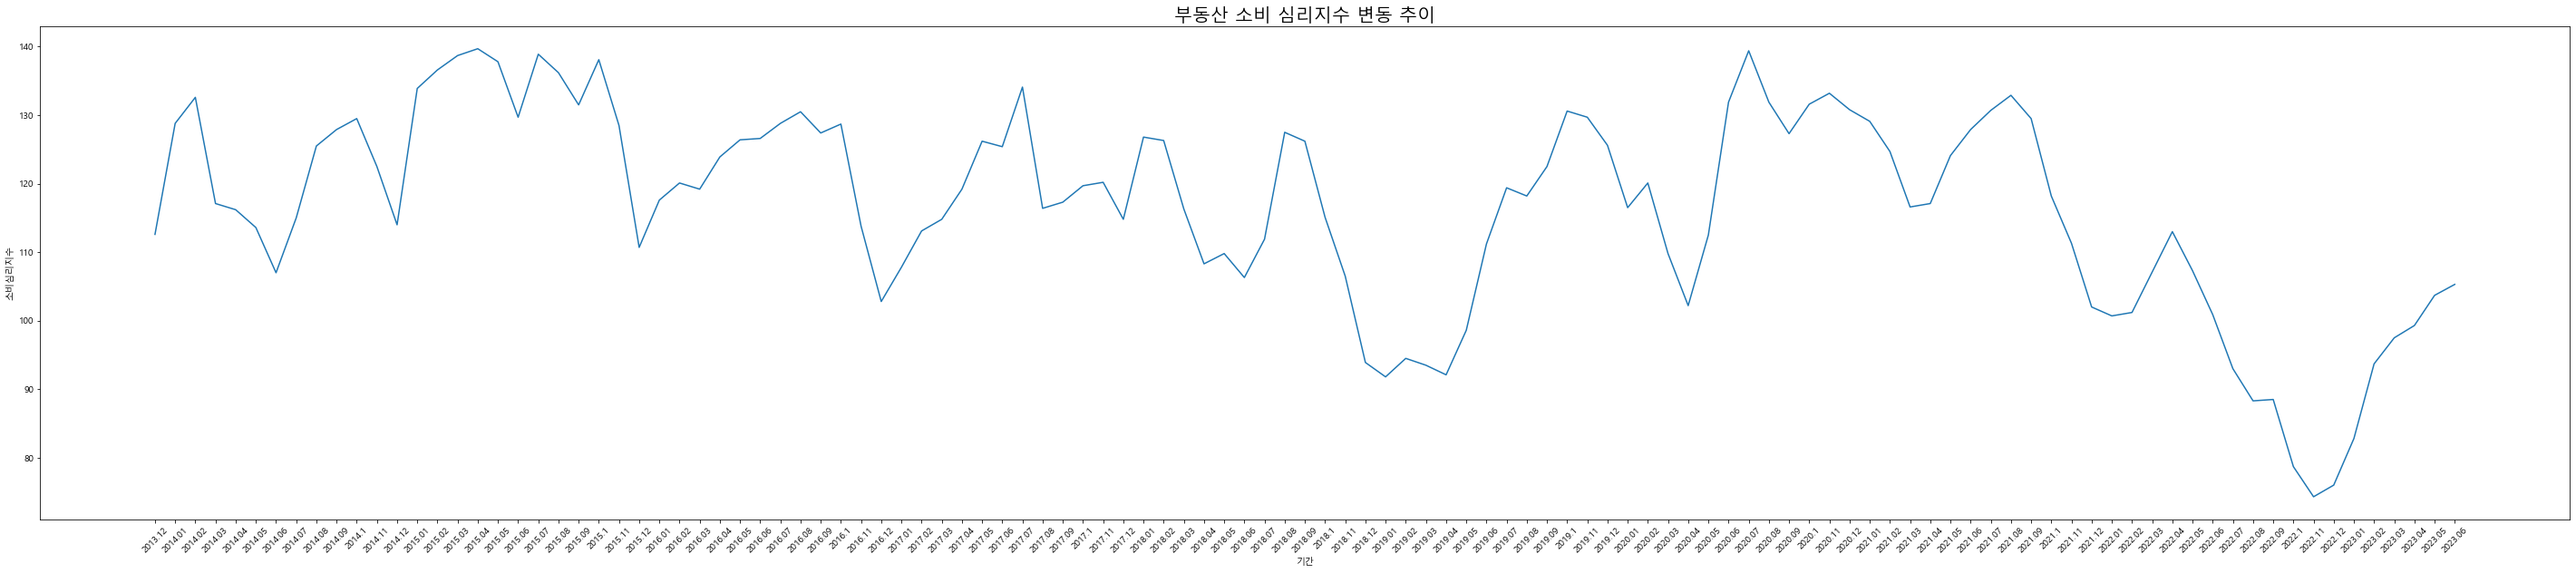

In [126]:
plt.figure(figsize= (50,10))
sns.lineplot(data = train_consume, x = '기간', y = '소비심리지수')

plt.title('부동산 소비 심리지수 변동 추이', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

### 아파트 매매 실거래 가격 지수
- KOSIS 데이터 : https://url.kr/xug7qv
- 서울 동남권 강남 기준
- 아파트의 실제 거래가를 기반으로 산출하는 지표
<br></br>
- 아파트 시장의 흐름을 파악하는데 사용함
- 데이터가 한 달 뒤에 생성되는 점을 고려하여, 전 월 데이터를 사용해 학습을 진행

In [59]:
trading_index = pd.read_excel('../data/유형별_매매가격지수.xlsx')
trading_index

,시점,아파트
0,시점,서울
1,시점,강남권역
2,시점,동남권
3,시점,강남
4,2013.12,66.6
5,2014.01,66.8
6,2014.02,67.3
7,2014.03,67.9
8,2014.04,67.8
9,2014.05,67.8


In [60]:
df_trading_index = trading_index.iloc[4:]
display(df_trading_index.head(3), df_trading_index.dtypes)

,시점,아파트
4,2013.12,66.6
5,2014.01,66.8
6,2014.02,67.3


시점     object
아파트    object
dtype: object

In [61]:
df_trading_index.columns = ['기간','아파트 매매 실거래 가격 지수']

In [62]:
df_trading_index['아파트 매매 실거래 가격 지수'] = df_trading_index['아파트 매매 실거래 가격 지수'].astype('float')

In [63]:
train_trading_index = df_trading_index[df_trading_index['기간'] < '202301']

<strong><font size = '4'>그래프 1-2 : 아파트 매매 실거래 가격 지수</strong>
    
- 2020년 초저금리와 풍부한 유동성, 전세가율 상승 및 매수 심리 상승세 등의 요인으로 상승세 지속
- 2021년 높은 상승률을 보임
- 2022년 높은 하락률을 보임

    

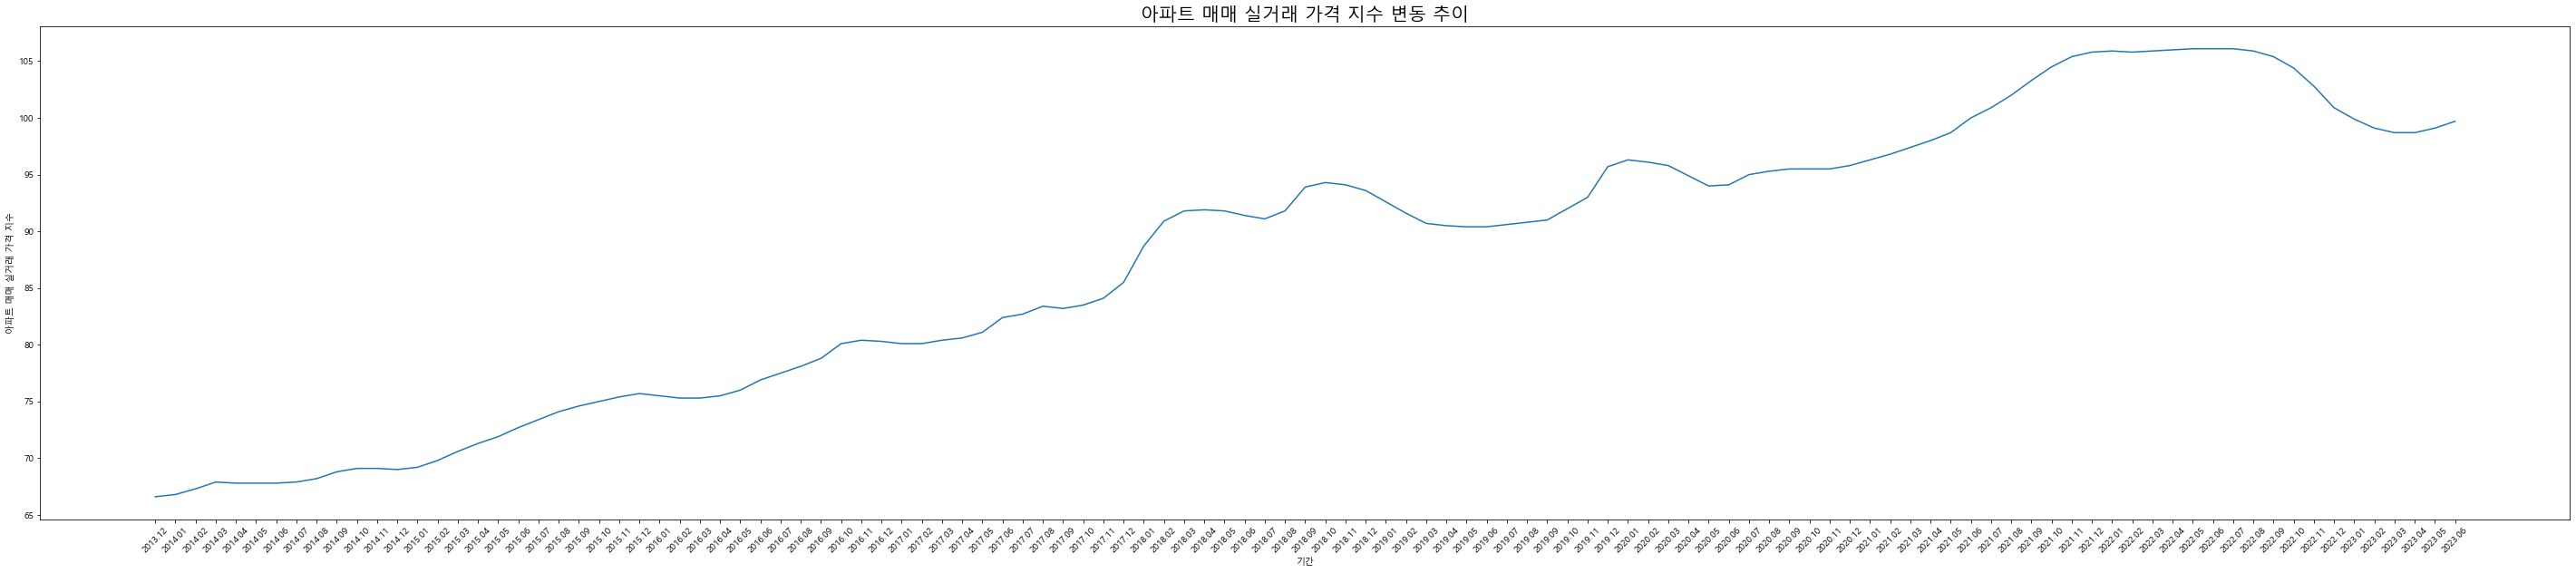

In [127]:
plt.figure(figsize= (50,10))
sns.lineplot(data = train_trading_index, x = '기간', y = '아파트 매매 실거래 가격 지수')
plt.title('아파트 매매 실거래 가격 지수 변동 추이', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

### 년도별 아파트 실거래가 

<strong><font size = '4'>그래프 2-1 : 년도별 아파트 실거래가 분포</strong>
- 년도별 아파트 실거래가 차이가 나는지 ANOVA 검정을 시행함
- 정규 분포와 분산의 동질성 검증을 만족하지 않아 로그변환을 시행했으나, 여전히 두 조건을 만족하지 못함
- 비모수적 검정인 크루스칼 왈리스 검정을 적용해 표본의 중위수가 같은지 검정하여 그룹별로 차이가 있는지 확인함
- 년도가 변화함에 따라 실거래가의 중앙값이 증가함

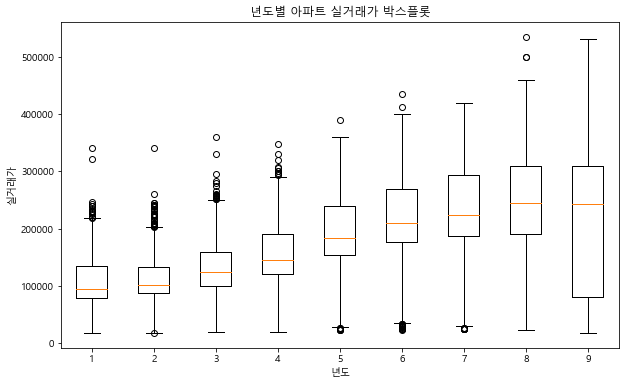

Kruskal-Wallis H-test 결과: H-value = 1912.7542430921785, p-value = 0.0
년도별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 있습니다.


In [128]:
plt.figure(figsize=(10, 6))
plt.boxplot([train['transaction_real_price'][train['year'] == y] for y in train['year'].unique()]) 
plt.title('년도별 아파트 실거래가 박스플롯')
plt.xlabel('년도')
plt.ylabel('실거래가')
plt.show()

# Kruskal-Wallis H-test 수행
kw_result = stats.kruskal(*[train['transaction_real_price'][train['year'] == y] for y in train['year'].unique()])

print(f'Kruskal-Wallis H-test 결과: H-value = {kw_result.statistic}, p-value = {kw_result.pvalue}')

# p-value 해석
if kw_result.pvalue < 0.05:
    print("년도별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("년도별 아파트 실거래가 간에는 통계적으로 유의미한 차이가 없습니다.")

In [129]:
train[train['transaction_real_price'] > np.percentile(train['transaction_real_price'], 75)].shape[0]

1497

In [130]:
year_lst =[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

cnt = 0

for year in year_lst:
    df = train[train['year'] == year]
    
    cnt += df[df['transaction_real_price'] > np.percentile(df['transaction_real_price'], 75)].shape[0]
cnt

1464

### 대치동 아파트 전세

- KOSIS : https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_08002_02&conn_path=I2
- 서울 동남권 강남 기준

- 국토교통부: https://rt.molit.go.kr/ 
- 아파트 전세 실거래가 데이터
- 전세가는 아파트의 수요와 공급 상황, 시장의 기대감 등 다양한 경제적 요인을 반영하기 때문에 실거래가 예측에 있어서 중요한 역할을 함
- 시장이 활성화되어 있거나, 특정 지역에 대한 수요가 높을 경우 전세가가 상승하며, 실거래가에도 영향을 미침

In [131]:
jeonse = pd.read_excel('../data/아파트 전세 실거래가.xlsx')
jeonse.head(1)

,시군구,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),층,건축년도,도로명,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,서울특별시 강남구 대치동,개포우성1,전세,84.81,201401,6,"70,000",10,1983,선릉로 120,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_jeonse = jeonse[jeonse.columns[:10]]
df_jeonse.head()

,시군구,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),층,건축년도,도로명
0,서울특별시 강남구 대치동,개포우성1,전세,84.81,201401,6,"70,000",10,1983,선릉로 120
1,서울특별시 강남구 대치동,개포우성1,전세,84.81,201401,7,"70,000",9,1983,선릉로 120
2,서울특별시 강남구 대치동,개포우성1,전세,84.81,201401,25,"60,000",13,1983,선릉로 120
3,서울특별시 강남구 대치동,개포우성1,전세,127.61,201401,2,"96,000",10,1983,선릉로 120
4,서울특별시 강남구 대치동,개포우성1,전세,127.61,201401,7,"87,000",11,1983,선릉로 120


In [70]:
df_jeonse.dtypes

시군구         object
단지명         object
전월세구분       object
전용면적(㎡)    float64
계약년월         int64
계약일          int64
보증금(만원)     object
층            int64
건축년도         int64
도로명         object
dtype: object

In [71]:
df_jeonse = df_jeonse[df_jeonse['계약년월'] < 202301]

In [72]:
df_jeonse['계약년월'] = df_jeonse['계약년월'].astype('object')
print(df_jeonse['계약년월'].dtypes)

object


In [73]:
df_jeonse['보증금(만원)'] = df_jeonse['보증금(만원)'].str.strip()  # 공백 제거

In [74]:
df_jeonse['보증금(만원)'] = df_jeonse['보증금(만원)'].str.replace(',', '')

In [75]:
df_jeonse['보증금(만원)'] = df_jeonse['보증금(만원)'].astype('int')

In [76]:
df_jeonse['계약년월'] = df_jeonse['계약년월'].astype('str')

In [77]:
df_jeonse['계약년월'].value_counts()[:5]

201912    310
202112    304
201712    293
201911    276
201812    248
Name: 계약년월, dtype: int64

<strong><font size = '4'>그래프 3-1 : 실거래가와 전세가</strong><br>
가설 5 : 전세가는 실거래가에 선행될 것이다.
- 전세가와 실거래가를 시각화 해 본 결과, 유사하게 움직이나 선행여부를 파악할 수 없음
    

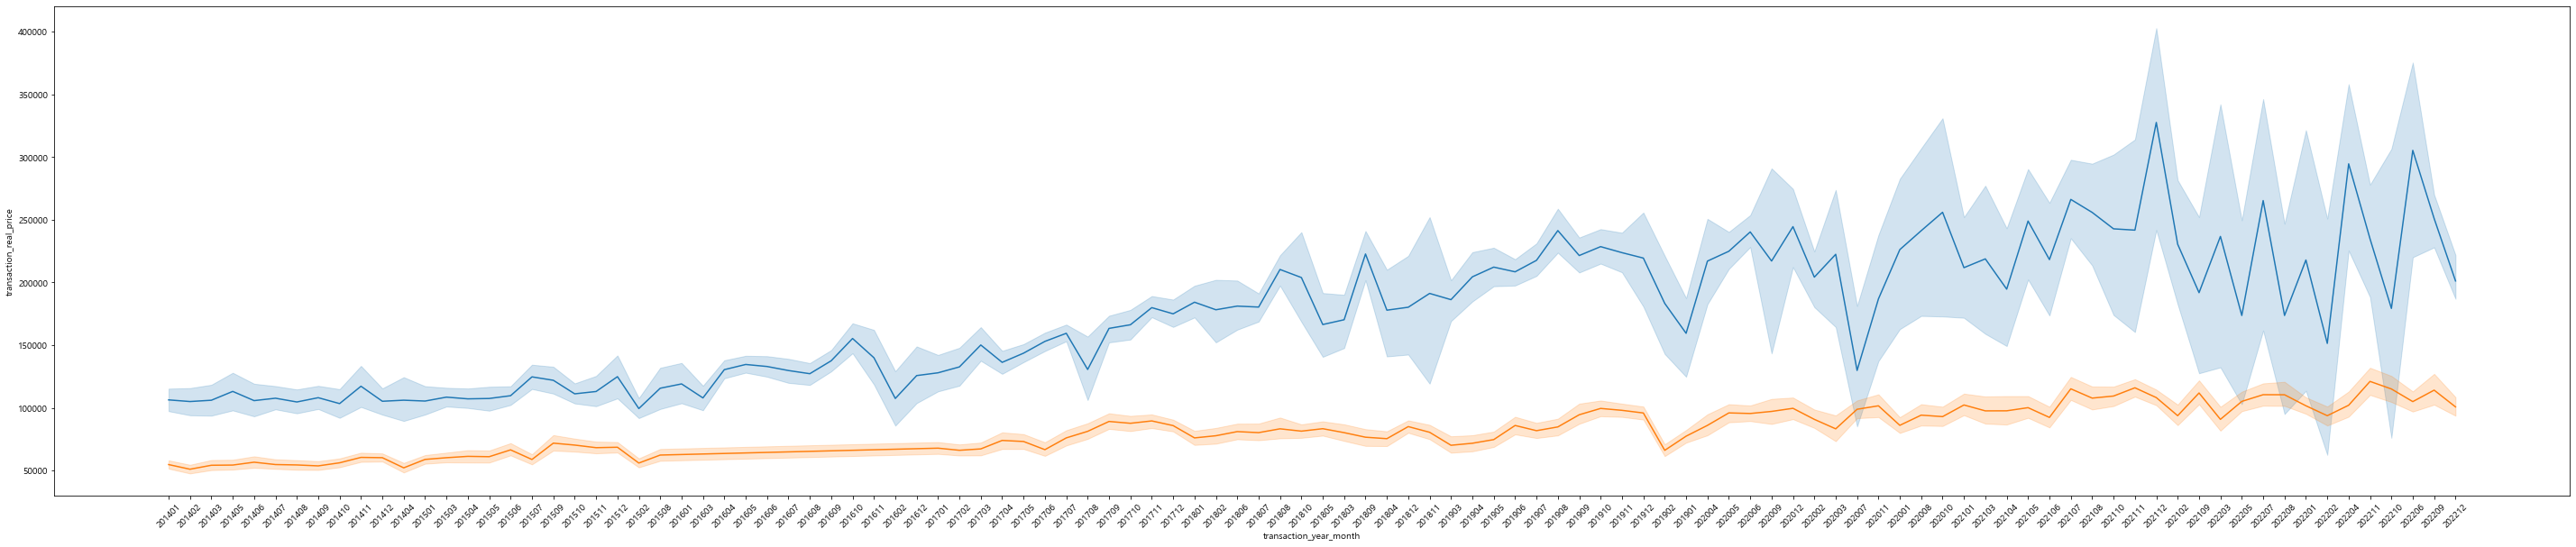

In [78]:
plt.figure(figsize= (50,10))
sns.lineplot(data = train, x = 'transaction_year_month', y = 'transaction_real_price')
sns.lineplot(data = df_jeonse, x = '계약년월', y= '보증금(만원)')
plt.xticks(rotation=45)
plt.show()

<font size = '3'>은마아파트 부동산 매매 가격과 전세 가격 비교 전처리

In [79]:
enma_train = train[train['apt_name'] == '은마']
enma_train.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,year,age,bucket_area
529,TRAIN_0529,서울특별시 강남구 대치동,316,은마,84.43,201401,5,89000.0,2,1979,train,2014,20년 초과,대형
530,TRAIN_0530,서울특별시 강남구 대치동,316,은마,76.79,201401,8,77500.0,8,1979,train,2014,20년 초과,중형
531,TRAIN_0531,서울특별시 강남구 대치동,316,은마,84.43,201401,9,90000.0,5,1979,train,2014,20년 초과,대형
532,TRAIN_0532,서울특별시 강남구 대치동,316,은마,76.79,201401,9,74800.0,1,1979,train,2014,20년 초과,중형
533,TRAIN_0533,서울특별시 강남구 대치동,316,은마,76.79,201401,10,77300.0,2,1979,train,2014,20년 초과,중형


In [80]:
enma_jeonse = df_jeonse[df_jeonse['단지명'] == '은마']

In [81]:
enma_jeonse.columns

Index(['시군구', '단지명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일', '보증금(만원)', '층', '건축년도',
       '도로명'],
      dtype='object')

<strong><font size = '4'>그래프 3-2 : 은마 실거래가와 전세가</strong><br>은마아파트 실거래가와 전세가 비교 

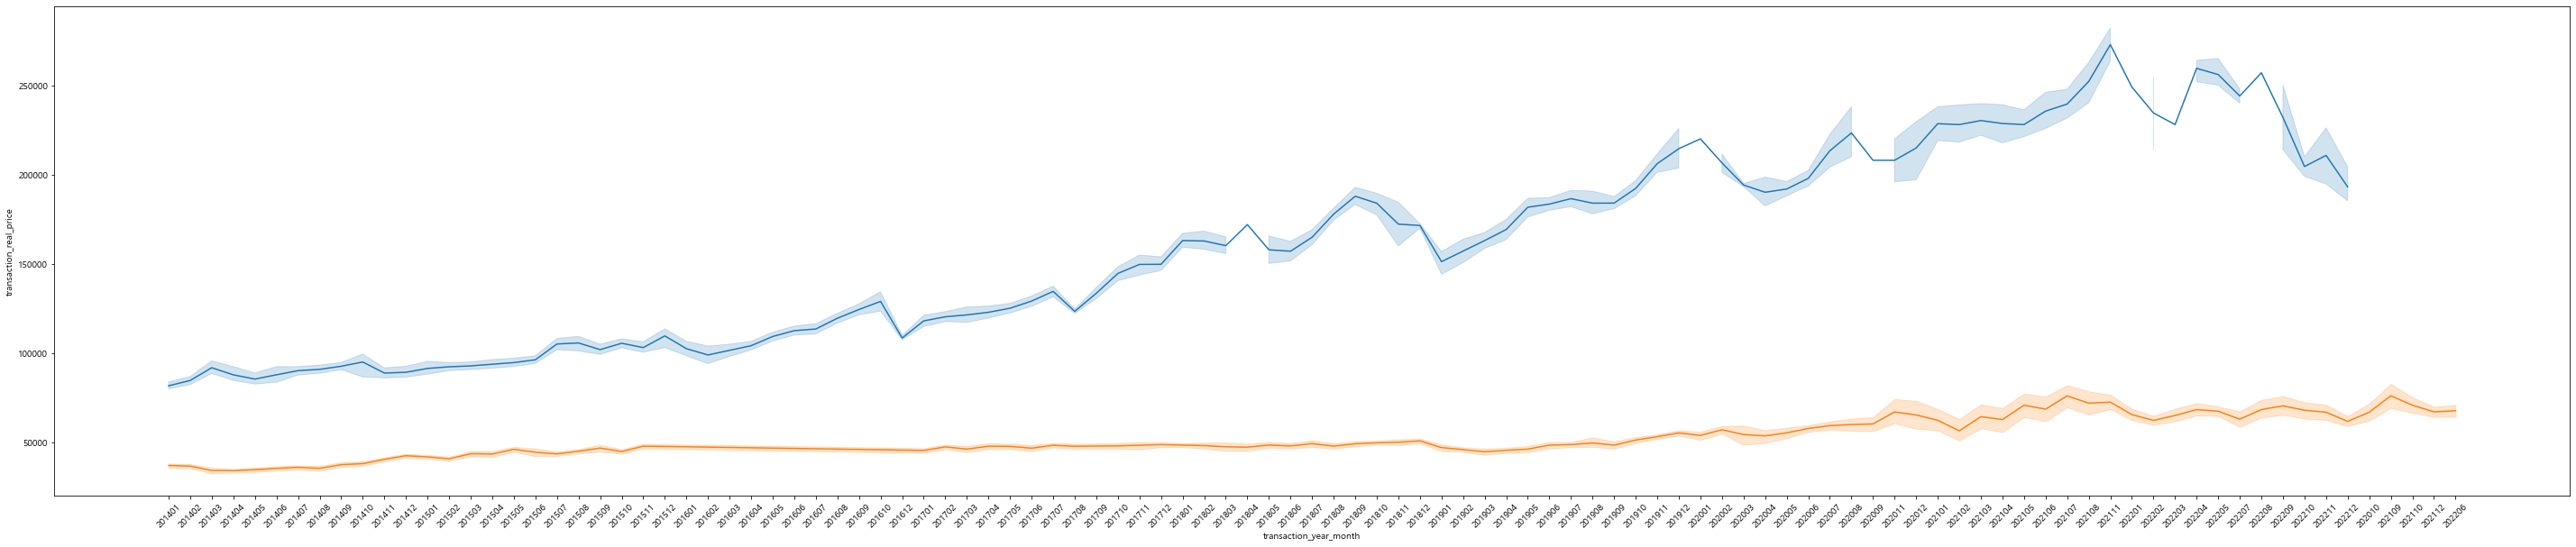

In [82]:
plt.figure(figsize= (50,10))
sns.lineplot(data = enma_train, x = 'transaction_year_month', y = 'transaction_real_price')
sns.lineplot(data = enma_jeonse, x = '계약년월', y= '보증금(만원)')
plt.xticks(rotation=45)
plt.show()

<strong><font size = '4'>그래프 3-2-1 : 은마아파트 실거래가 </strong><br> 

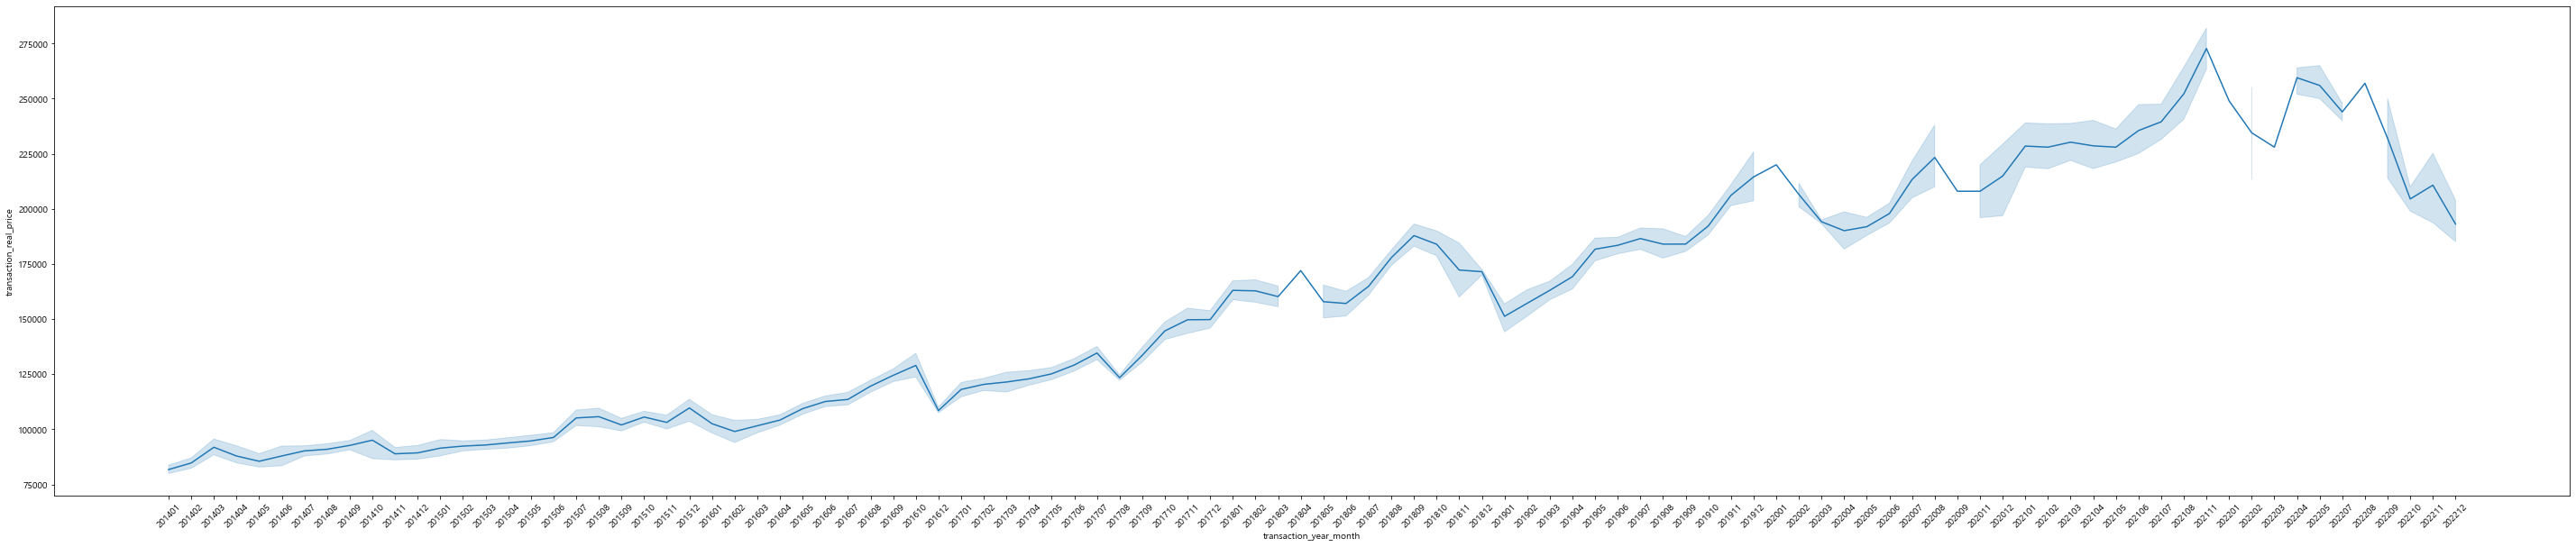

In [83]:
plt.figure(figsize= (50,10))
sns.lineplot(data = enma_train, x = 'transaction_year_month', y = 'transaction_real_price')
plt.xticks(rotation=45)
plt.show()

<strong><font size = '4'>그래프 3-2-2 : 은마아파트 전세가 </strong><br> 
- 실거래가보다 전세가가 더 민감하게 반응

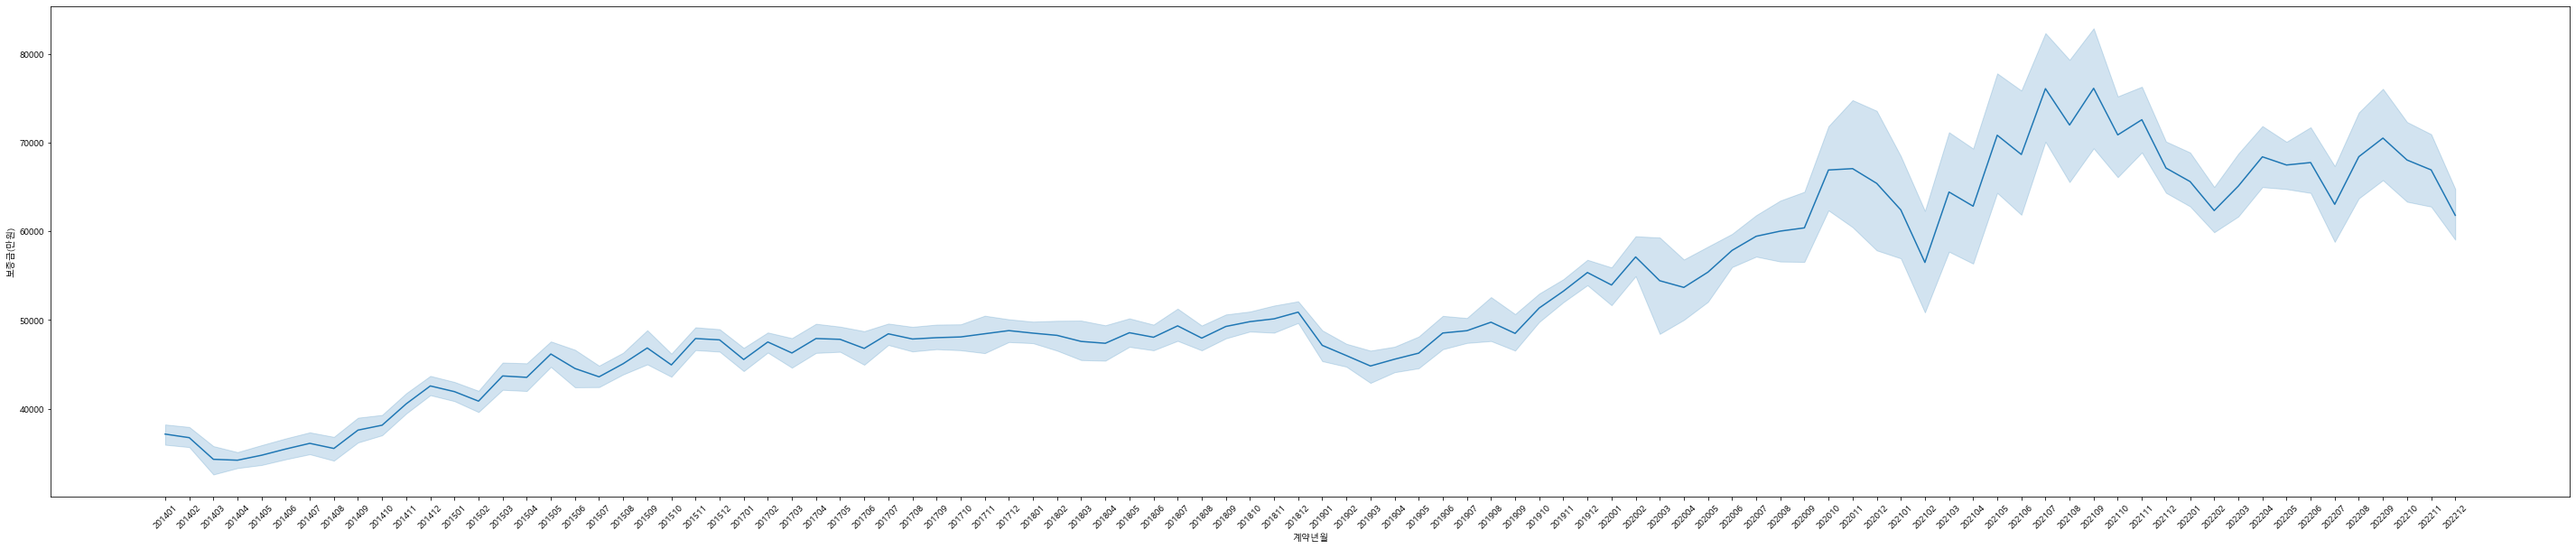

In [84]:
plt.figure(figsize= (50,10))
sns.lineplot(data = enma_jeonse, x = '계약년월', y= '보증금(만원)')
plt.xticks(rotation=45)
plt.show()

<strong><font size = '4'> Granger 인과관계 모형</strong><br>
가설 5 : 전세 가격은 실거래가에 선행될 것이다.
- 그랜저 인과관계 : X라는 사건과 Y라는 사건이 서로 인과관계가 있는지 확인하는 모형
- 어떤 현상의 예측에 있어서 다른 정보를 이용하는 것이 얼마나 유의미한지 나타내는 지표
- rf : https://sosoeasy.tistory.com/400
<br>
    
- 그랜저 인과관계 검증을 위해 전세 데이터 대신 아파트 전세 가격 지수로 대체함
- 아파트 전세 가격 지수와 아파트 실거래 가격 지수를 활용하여 선행여부에 대한 검증을 진행함

In [85]:
jeonse_index = pd.read_excel('../data./유형별_전세가격지수.xlsx')
jeonse_index.head(5)

,시점,아파트
0,시점,서울
1,시점,강남권역
2,시점,동남권
3,시점,강남
4,2013.12,76.4


In [86]:
df_jeonse_index = jeonse_index.iloc[4:]
df_jeonse_index.head(3)

,시점,아파트
4,2013.12,76.4
5,2014.01,77.1
6,2014.02,77.6


In [87]:
df_jeonse_index.columns = ['기간', '아파트 전세 가격 지수']

In [88]:
len(df_jeonse_index), len(df_trading_index)

(115, 115)

In [93]:
df_index = pd.merge(df_jeonse_index, df_trading_index, how = 'inner', on = '기간')
df_index.head(4)

,기간,아파트 전세 가격 지수,아파트 매매 실거래 가격 지수
0,2013.12,76.4,66.6
1,2014.01,77.1,66.8
2,2014.02,77.6,67.3
3,2014.03,78.1,67.9


In [94]:
df_index['아파트 전세 가격 지수'] = df_index['아파트 전세 가격 지수'].astype('float')

<strong><font size = '4'> Granger 인과관계 ( 전세가 -> 실거래가 ) </strong><br>
<strong> 가설확인 : 전세가가 실거래가에 선행될 것이다. </strong>

- 귀무가설 : 전세가가 실거래가를 예측하는데 도움되지 않는다.
- 대립가설 : 전세가가 실거래가를 예측하는데 도움된다.

<strong> 의사결정 </strong>
- p-value >= 0.05 : 전세가가 실거래가를 예측하는데 도움되지 않는다.
- p-value < 0.05 : 전세가가 실거래가를 예측하는데 도움된다.

<strong> 결과해석 : 전세가와 실거래가의 인과관계가 성립한다. </strong>

- X->Y가 유의미하고 Y->X가 유의미하지 않으면 인과관계 (X->Y) 성립
- 전세 가격 지수 -> 실거래 가격 지수는 p-value의 값이 유의수준 0.05라고 했을 때 2달간 영향을 미친다.
- 실거래 가격 지수 -> 전세 가격 지수는 p-value의 값이 유의수준 0.05라고 했을 때 영향을 미치지 않는다.
- 통계적으로 전세가의 변동이 실거래가에 단기적으로 영향을 줌

- 검증을 통해 전세 가격의 변동이 실거래가 변동에 중요한 변수로 작용할 수 있음을 시사
- 개별 아파트의 전세 데이터를 사용하여 예측 모델링을 진행한다면 세밀한 분석이 가능할 것으로 보임

In [95]:
from statsmodels.tsa.stattools import grangercausalitytests


# 그랜저 인과관계 검정 수행
max_lag = 5 # 최대 시차 설정

# 전세 가격 지수 -> 실거래 가격 지수
print('### 전세 가격 지수 -> 실거래 가격 지수')
results1 = grangercausalitytests(df_index[['아파트 전세 가격 지수', '아파트 매매 실거래 가격 지수']], max_lag, verbose=True)

### 전세 가격 지수 -> 실거래 가격 지수

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.1368  , p=0.0031  , df_denom=111, df_num=1
ssr based chi2 test:   chi2=9.3837  , p=0.0022  , df=1
likelihood ratio test: chi2=9.0175  , p=0.0027  , df=1
parameter F test:         F=9.1368  , p=0.0031  , df_denom=111, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.8248  , p=0.0098  , df_denom=108, df_num=2
ssr based chi2 test:   chi2=10.0963 , p=0.0064  , df=2
likelihood ratio test: chi2=9.6704  , p=0.0079  , df=2
parameter F test:         F=4.8248  , p=0.0098  , df_denom=108, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7594  , p=0.1595  , df_denom=105, df_num=3
ssr based chi2 test:   chi2=5.6301  , p=0.1311  , df=3
likelihood ratio test: chi2=5.4932  , p=0.1390  , df=3
parameter F test:         F=1.7594  , p=0.1595  , df_denom=105, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:     

In [96]:
# 실거래 가격 지수 -> 전세 가격 지수
print('### 실거래 가격 지수 -> 전세 가격 지수')
results2 = grangercausalitytests(df_index[['아파트 매매 실거래 가격 지수','아파트 전세 가격 지수']], max_lag, verbose=True)

### 실거래 가격 지수 -> 전세 가격 지수

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8596  , p=0.0936  , df_denom=111, df_num=1
ssr based chi2 test:   chi2=2.9369  , p=0.0866  , df=1
likelihood ratio test: chi2=2.8997  , p=0.0886  , df=1
parameter F test:         F=2.8596  , p=0.0936  , df_denom=111, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0944  , p=0.9100  , df_denom=108, df_num=2
ssr based chi2 test:   chi2=0.1975  , p=0.9060  , df=2
likelihood ratio test: chi2=0.1974  , p=0.9060  , df=2
parameter F test:         F=0.0944  , p=0.9100  , df_denom=108, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9471  , p=0.4207  , df_denom=105, df_num=3
ssr based chi2 test:   chi2=3.0308  , p=0.3869  , df=3
likelihood ratio test: chi2=2.9905  , p=0.3931  , df=3
parameter F test:         F=0.9471  , p=0.4207  , df_denom=105, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:     